# Data Analysis for INST 204 Audit

This file is for playing with the data we will investigate in the audit. We can also use it to generate plots that we can put into the writeup. Feel free to modify the dataframe, but make sure to make a copy beforehand. I'm going to leave observations with missing data in because I think missing elements tell an important story in showing the flaws of the data.

In [2]:
# Import the required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and cleaning Data

In [3]:
# Read the data from the CSV file
base_df = pd.read_csv("cook_county_gang_data.csv")

# Change the column names to be shorter. This is to make the dataframe easier to work with
base_df = base_df.rename(
    {"Subject_ID": "subject_id", 
     "Subject_Sex": "sex", 
     "chicago": "town", 
     "address_state": "state", 
     "address_zip": "zipcode", 
     "Subject_Gang_ID": "gang_id",
     "Subject_Height": "height",
     "Subject_Weight": "weight",
     "Subject_Felon": "is_felon",
     "Subject_Probation": "on_probation",
     "Subject_Admits_Gang": "admits_gang",
     "Subject_Wears_Colors": "wears_colors",
     "Subject_Armed": "is_armed",
     "Subject_Race_ID": "race",
     "Subject_Eye_Color_ID": "eye_color",
     "Subject_Hair_Color_ID": "hair_color",
     "Subject_Create_Date": "record_creation_date",
     "Subject_Approved_Date": "record_approval_date",
     "Subject_Deceased": "is_deceased",
     "Has the individual been arrested in the company of known criminal gang members for offenses which are consistent with criminal gang activity?": "arrested_with_gang_members_for_suspected_gang_activity",
     "Has the individual been identified by an individual of proven reliability as a criminal gang member?": "gang_identified_by_known_gang_member",
     "Has the individual admitted membership in a criminal gang, and was this a credible self-admission made to a law enforcement officer or agent?": "admitted_gang_membership_to_law_enforcement",
     "Does the individual possess tattoos that a trained law enforcement officer or agent has reasonable suspicion to believe signify gang membership?": "has_gang_related_tattoos",
     "Does the individual reside in or frequent a particular criminal gang's area or affect their style of dress, use of hand signs, symbols, or maintain an ongoing relationship with known criminal gang members, and where the law enforcement officer documents reasonable suspicion that the individual is involved in criminal gang-related activity or enterprise?": "looks_like_gang_member",
     "Age as of 8/6/18": "age_in_2018"
    }, axis="columns")

# Fixing the binary columns to replace NaN with N/No (this will make analysis easier)
base_df["is_felon"] = base_df["is_felon"].fillna("N")
base_df["on_probation"] = base_df["on_probation"].fillna("N")
base_df["admits_gang"] = base_df["admits_gang"].fillna("N")
base_df["wears_colors"] = base_df["wears_colors"].fillna("N")
base_df["is_armed"] = base_df["is_armed"].fillna("N")
base_df["arrested_with_gang_members_for_suspected_gang_activity"] = base_df["arrested_with_gang_members_for_suspected_gang_activity"].fillna("No")
base_df["gang_identified_by_known_gang_member"] = base_df["gang_identified_by_known_gang_member"].fillna("No")
base_df["admitted_gang_membership_to_law_enforcement"] = base_df["admitted_gang_membership_to_law_enforcement"].fillna("No")
base_df["has_gang_related_tattoos"] = base_df["has_gang_related_tattoos"].fillna("No")
base_df["looks_like_gang_member"] = base_df["looks_like_gang_member"].fillna("No")

# Replace yes/no columns with boolean values
base_df["is_felon"] = base_df["is_felon"].replace({"Y": True, "N": False})
base_df["on_probation"] = base_df["on_probation"].replace({"Y": True, "N": False})
base_df["admits_gang"] = base_df["admits_gang"].replace({"Y": True, "N": False})
base_df["wears_colors"] = base_df["wears_colors"].replace({"Y": True, "N": False})
base_df["is_armed"] = base_df["is_armed"].replace({"Y": True, "N": False})
base_df["arrested_with_gang_members_for_suspected_gang_activity"] = base_df["arrested_with_gang_members_for_suspected_gang_activity"].replace({"Yes": True, "No": False})
base_df["gang_identified_by_known_gang_member"] = base_df["gang_identified_by_known_gang_member"].replace({"Yes": True, "No": False})
base_df["admitted_gang_membership_to_law_enforcement"] = base_df["admitted_gang_membership_to_law_enforcement"].replace({"Yes": True, "No": False})
base_df["has_gang_related_tattoos"] = base_df["has_gang_related_tattoos"].replace({"Yes": True, "No": False})
base_df["looks_like_gang_member"] = base_df["looks_like_gang_member"].replace({"Yes": True, "No": False})

# Display first 15 observations of dataframe for verification
base_df.head(15)

,subject_id,sex,town,state,zipcode,gang_id,height,weight,is_felon,on_probation,...,hair_color,record_creation_date,record_approval_date,is_deceased,arrested_with_gang_members_for_suspected_gang_activity,gang_identified_by_known_gang_member,admitted_gang_membership_to_law_enforcement,has_gang_related_tattoos,looks_like_gang_member,age_in_2018
0,6,M,Gary,IN,46409,FBJB Gang (Gary),603.0,300.0,False,False,...,Black,12/4/2017,12/4/2017,F,True,True,True,True,True,32.57
1,7,M,Gary,IN,46409,Vice Lords (People),506.0,140.0,False,True,...,Black,10/26/2017,10/26/2017,F,True,True,True,False,True,30.94
2,8,M,Gary,IN,46403,Vice Lords (People),510.0,170.0,False,False,...,Gray,3/28/2018,3/28/2018,F,True,True,True,False,True,64.40
3,10,M,Gary,IN,46408,Vice Lords (People),509.0,140.0,False,False,...,Black,3/29/2018,3/29/2018,F,True,True,False,False,True,53.37
4,11,M,Gary,IN,46408,Vice Lords (People),NaN,NaN,False,False,...,NaN,2/16/2016,6/24/2013,F,True,True,False,False,False,33.96
5,12,M,Gary,IN,46409,Vice Lords (People),NaN,NaN,False,False,...,Black,6/6/2017,6/24/2013,F,True,True,False,False,True,52.95
6,13,M,Gary,IN,46408,Vice Lords (People),504.0,130.0,False,False,...,Black,10/26/2017,10/26/2017,F,True,True,False,False,True,30.02
7,14,M,NaN,NaN,NaN,Vice Lords (People),NaN,NaN,False,False,...,Black,3/28/2018,3/28/2018,F,True,True,False,False,True,37.51
8,15,M,Gary,IN,46409,Vice Lords (People),600.0,190.0,False,False,...,Black,3/23/2015,6/24/2013,F,True,True,False,False,False,36.99
9,16,M,Merrillville,IN,46410,Vice Lords (People),505.0,240.0,True,True,...,Black,11/21/2017,11/21/2017,F,True,True,True,False,True,31.71


## Analysis

Here are some ideas I have for things we could look at that I haven't done yet:

* Distribution of how long subjects have been in the database (subtract the day the subject was entered/approved from the day the ages were added: August 6, 2018)
* Proportions of people who are felons or not (we could also do this for probation)
* Compare the demographics of people who have `true` in the last column with the overall database

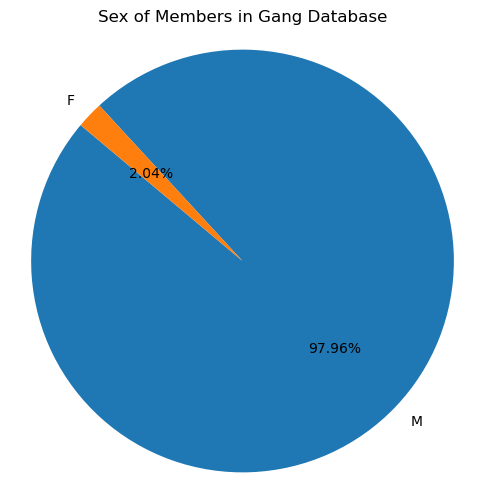

In [4]:
# Gender pie chart
sex_counts = base_df["sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Sex of Members in Gang Database")
plt.axis("equal")
plt.show()

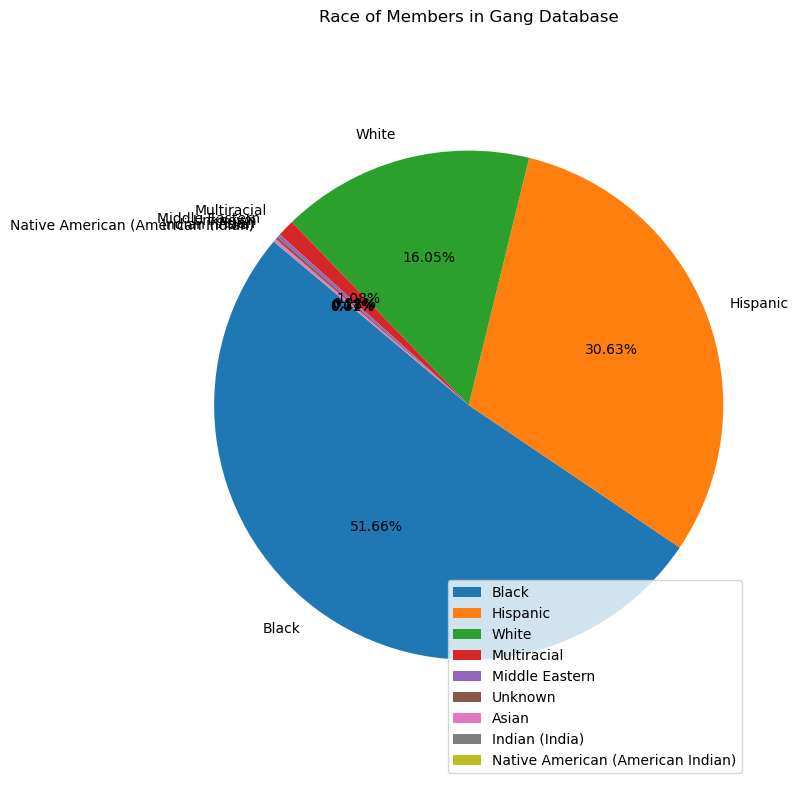

In [5]:
# Race pie chart
race_counts = base_df["race"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Race of Members in Gang Database")
plt.legend(loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

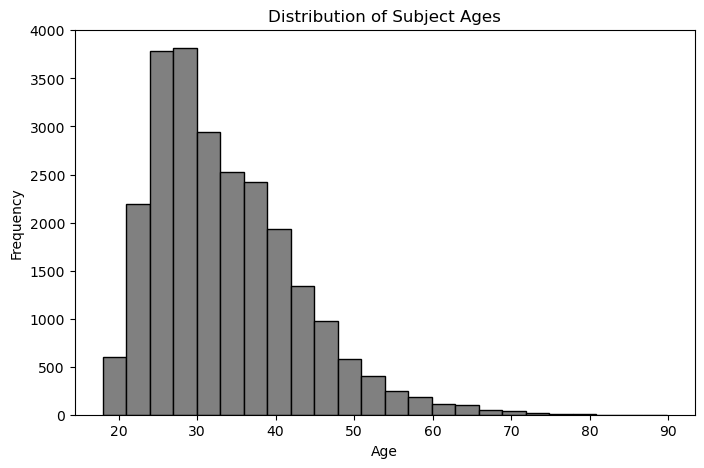

count    24299.000000
mean        33.560112
std          9.195676
min         18.010000
25%         26.600000
50%         31.640000
75%         38.860000
max         89.780000
Name: age_in_2018, dtype: float64

In [6]:
# Age histogram
plt.figure(figsize=(8, 5))
plt.hist(base_df['age_in_2018'], bins=24, color='grey', edgecolor='black')
plt.title('Distribution of Subject Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
base_df["age_in_2018"].describe()

In [7]:
# Gender and race two-way table
pd.crosstab(index=base_df['race'], columns=base_df['sex'])

sex,F,M
race,,
Asian,0,35
Black,122,10441
Hispanic,170,6070
Indian (India),0,2
Middle Eastern,0,44
Multiracial,21,201
Native American (American Indian),0,2
Unknown,2,35
White,152,3117


town
Chicago          3206
Gary             1684
Hammond          1009
East Chicago      674
CHICAGO           476
                 ... 
Weslaco             1
Culver              1
Peotone             1
buffalo grove       1
New Buffalo         1
Name: count, Length: 797, dtype: int64


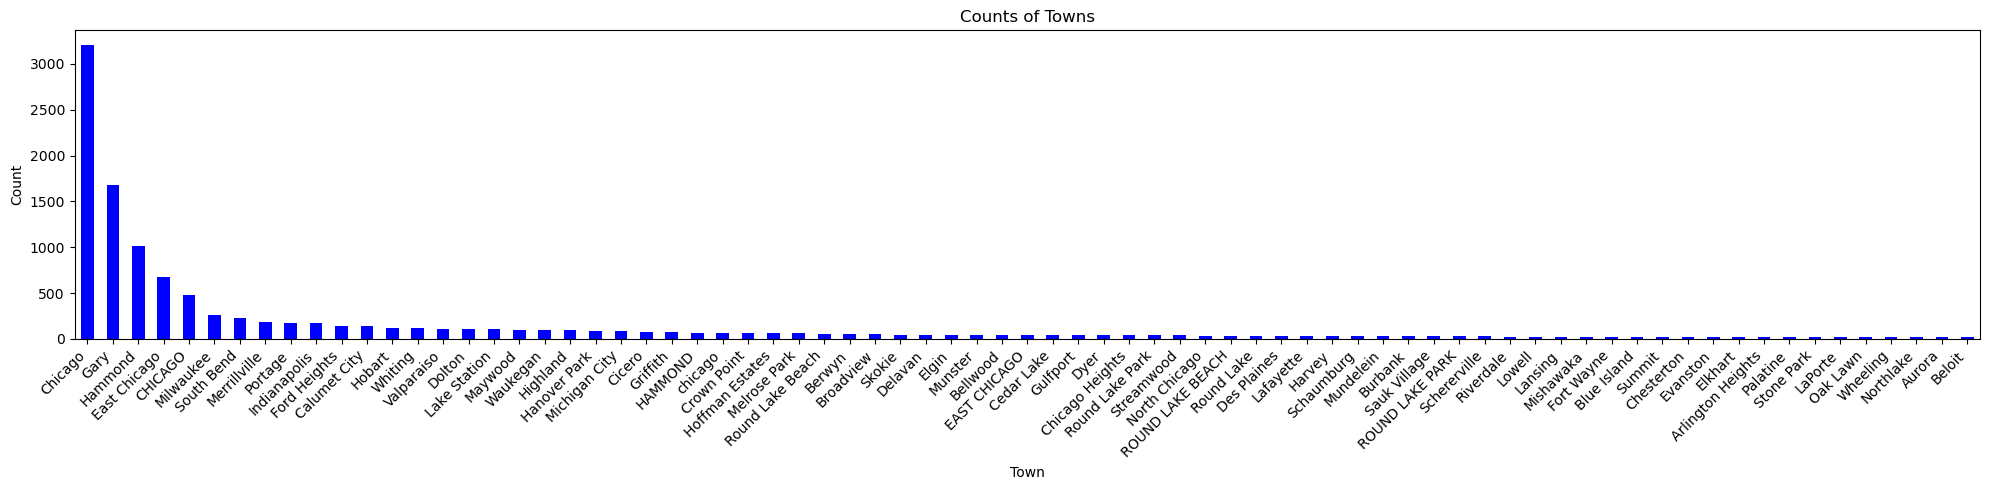

In [8]:
# Location (just towns) bar graph
town_counts = base_df["town"].dropna().value_counts()
print(town_counts)
town_counts = town_counts.head(75) # There are too many towns to display all of them on the graph
plt.figure(figsize=(20, 5))
town_counts.plot(kind='bar', color='blue')
plt.title('Counts of Towns')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis on Observations With `True` in the Second-to-Last Column

Aside from the question feeling very vague and potentially biased, I'm curious how the demographics change when this is filtered.

> Does the individual reside in or frequent a particular criminal gang's area or affect their style of dress, use of hand signs, symbols, or maintain an ongoing relationship with known criminal gang members, and where the law enforcement officer documents reasonable suspicion that the individual is involved in criminal gang-related activity or enterprise?

In [9]:
# Copy the original dataframe
looks_like_df = base_df.copy(deep=True)

# Filter out to just subjects with "True" on the second-to-last feature
looks_like_df = looks_like_df[looks_like_df.looks_like_gang_member == True]

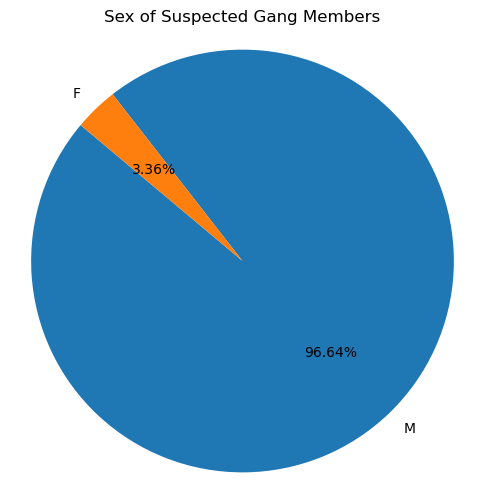

In [10]:
# Redrawing the plots for sex, race, age, and location on the filtered data
# Sex
sex_counts = looks_like_df["sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Sex of Suspected Gang Members")
plt.axis("equal")
plt.show()

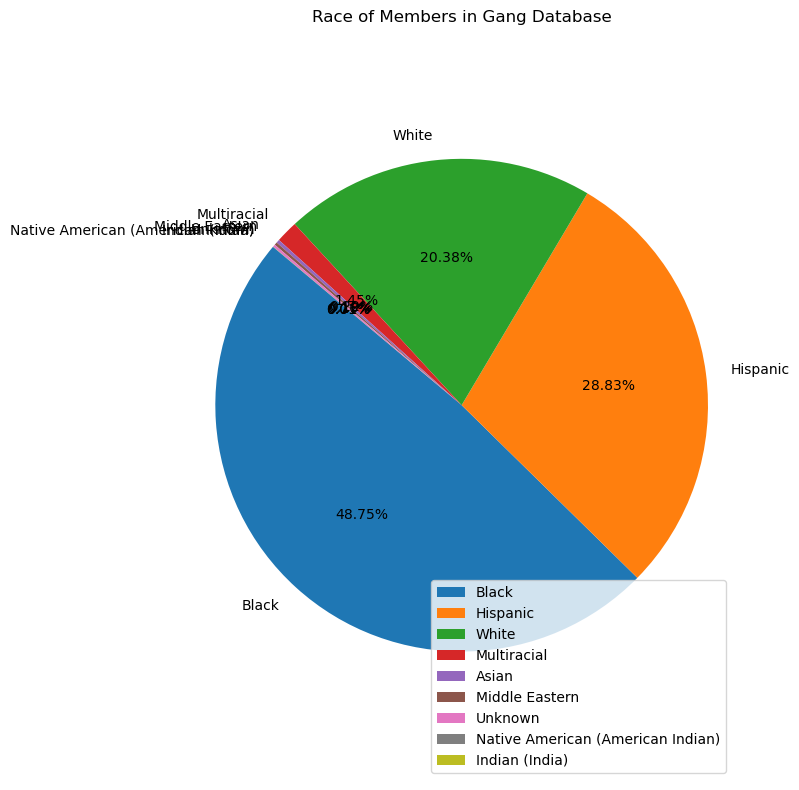

In [11]:
# Race
race_counts = looks_like_df["race"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Race of Members in Gang Database")
plt.legend(loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

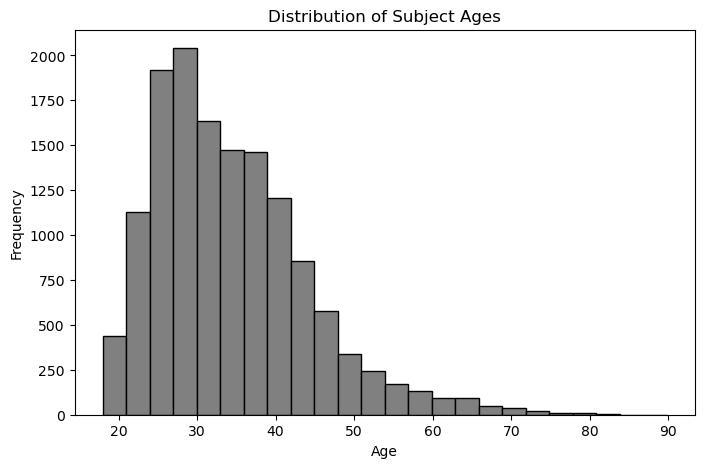

count    24299.000000
mean        33.560112
std          9.195676
min         18.010000
25%         26.600000
50%         31.640000
75%         38.860000
max         89.780000
Name: age_in_2018, dtype: float64

In [12]:
# Age
plt.figure(figsize=(8, 5))
plt.hist(looks_like_df['age_in_2018'], bins=24, color='grey', edgecolor='black')
plt.title('Distribution of Subject Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
base_df["age_in_2018"].describe()

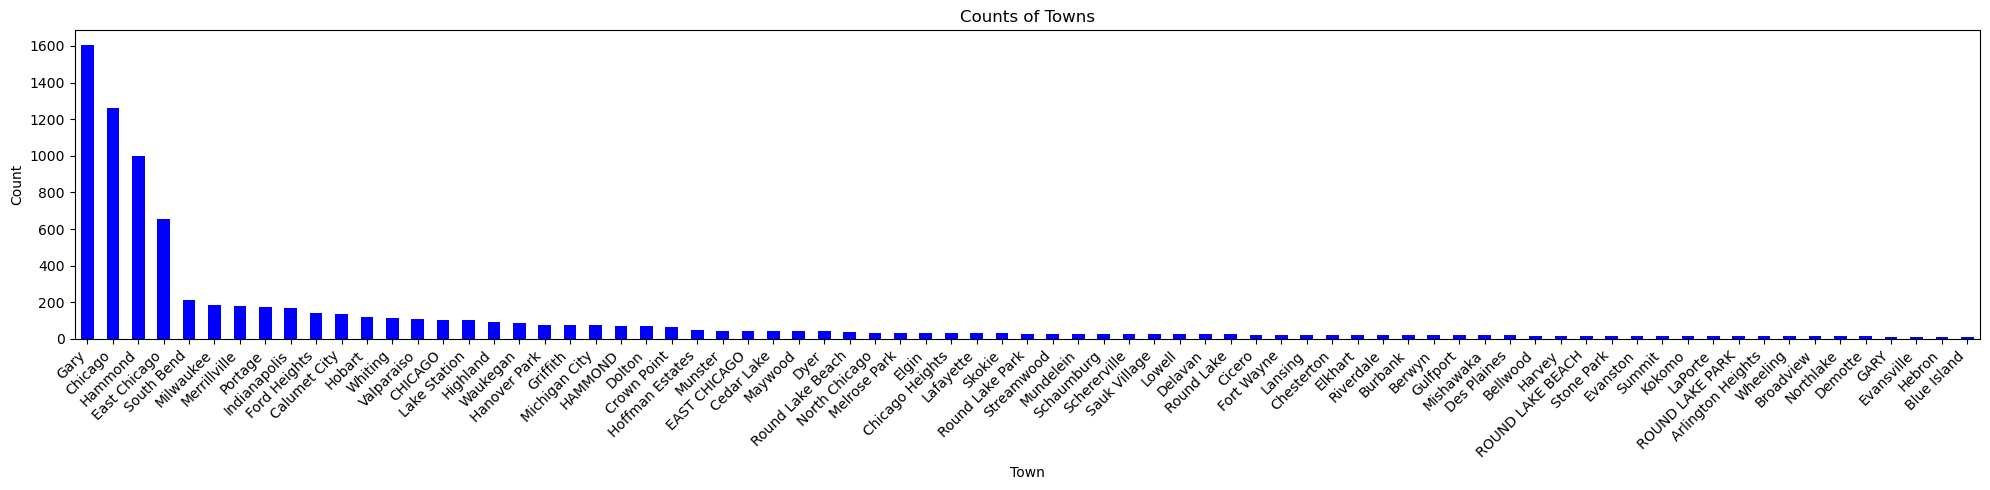

In [13]:
# Location
town_counts = looks_like_df["town"].dropna().value_counts()
town_counts = town_counts.head(75) # There are too many towns to display all of them on the graph
plt.figure(figsize=(20, 5))
town_counts.plot(kind='bar', color='blue')
plt.title('Counts of Towns')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It doesn't look like filtering that way will help us find any issues.

## Analysis on Felons

In [14]:
# Two-way table of felons and parole
pd.crosstab(index=base_df['is_felon'], columns=base_df['on_probation'])

on_probation,False,True
is_felon,,
False,15666,334
True,6605,2366


One interesting thing we can see from this is that the majority of the people in this database have never committed a felony. While this doesn't mean they aren't involved in illegal gang activity, it is a potential signifier that a lot of people on this list are being unfairly targeted by police.

In [15]:
# Two-way table of felons and people who've been arrested with gang members
pd.crosstab(index=base_df['is_felon'], columns=base_df['arrested_with_gang_members_for_suspected_gang_activity'])

arrested_with_gang_members_for_suspected_gang_activity,False,True
is_felon,,
False,13108,2892
True,6291,2680


Most people in this database haven't been arrested with gang members for known gang activity. Most felons haven't either. We really should have more information about the crimes/felonies people committed.

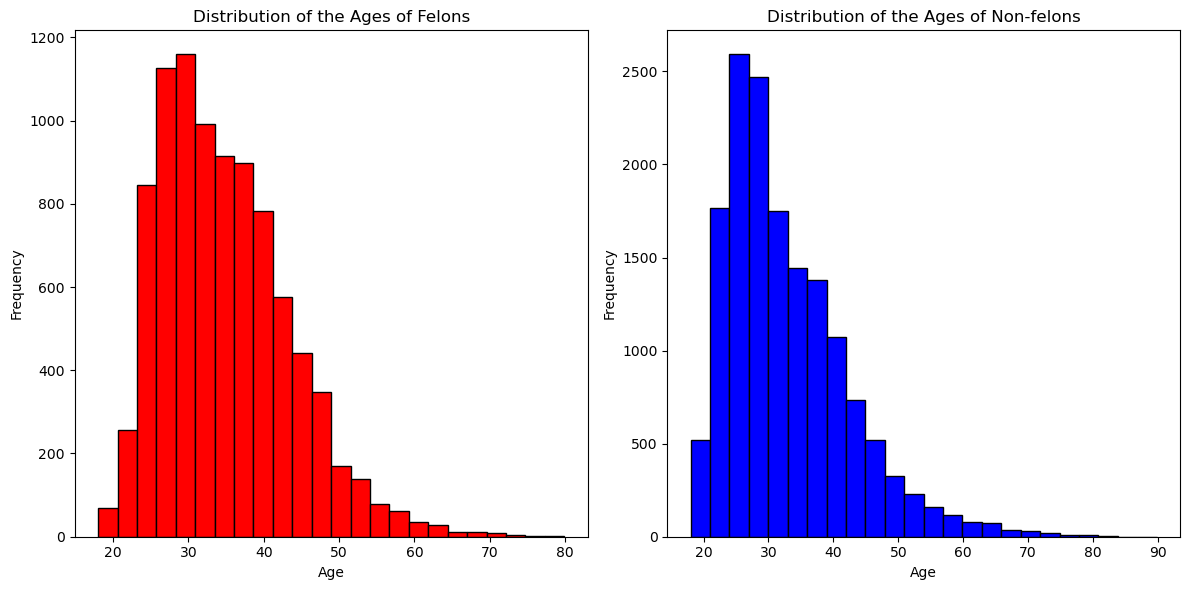

In [16]:
# Plot the age distribution of felons vs. non-felons
plt.figure(figsize=(12, 6))

# Plot the first histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(base_df.loc[base_df['is_felon'] == True, 'age_in_2018'], bins=24, color='red', edgecolor='black')
plt.title('Distribution of the Ages of Felons')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot the second histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(base_df.loc[base_df['is_felon'] == False, 'age_in_2018'], bins=24, color='blue', edgecolor='black')
plt.title('Distribution of the Ages of Non-felons')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

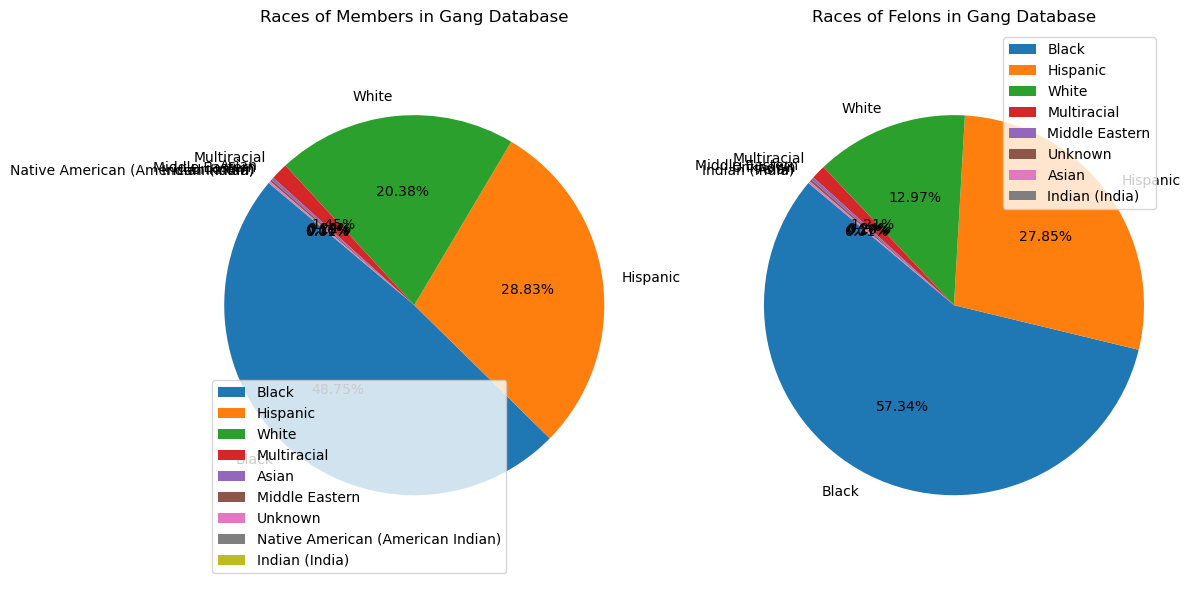

In [17]:
# Plot the racial breakdown of felons
plt.figure(figsize=(12, 6))

# Racial breakdown for the entire database
plt.subplot(1, 2, 1)
race_counts = looks_like_df["race"].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Races of Members in Gang Database")
plt.legend(loc="best")
plt.axis("equal")

# Racial breakdown for felons
plt.subplot(1, 2, 2)
felon_race_counts = base_df.loc[base_df['is_felon'] == True, 'race'].value_counts()
plt.pie(felon_race_counts, labels=felon_race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Races of Felons in Gang Database")
plt.legend(loc="best")
plt.axis("equal")

plt.tight_layout()
plt.show()

For felons, black people are ~7% overrepresented, while white people are underrepresented by roughly the same amount. The proportion of Latinos stays stable.

## Analysis on Self-admitted Gang Members

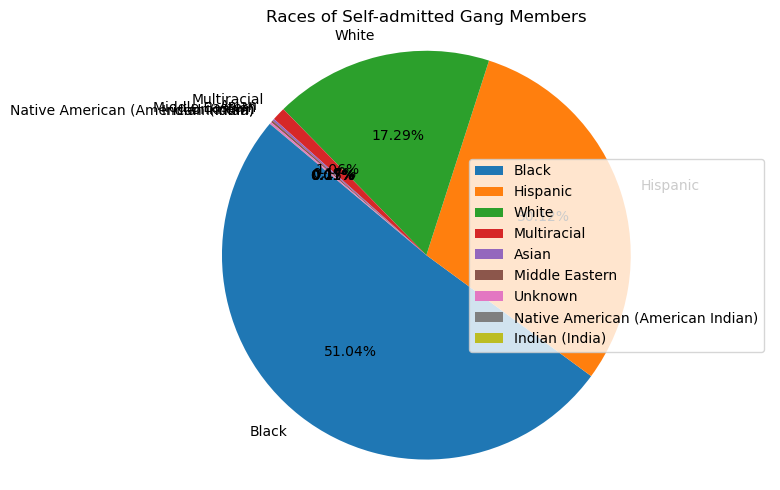

In [18]:
# Race
gang_race_counts = base_df.loc[base_df['admits_gang'] == True, 'race'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(gang_race_counts, labels=race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Races of Self-admitted Gang Members")
plt.legend(loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

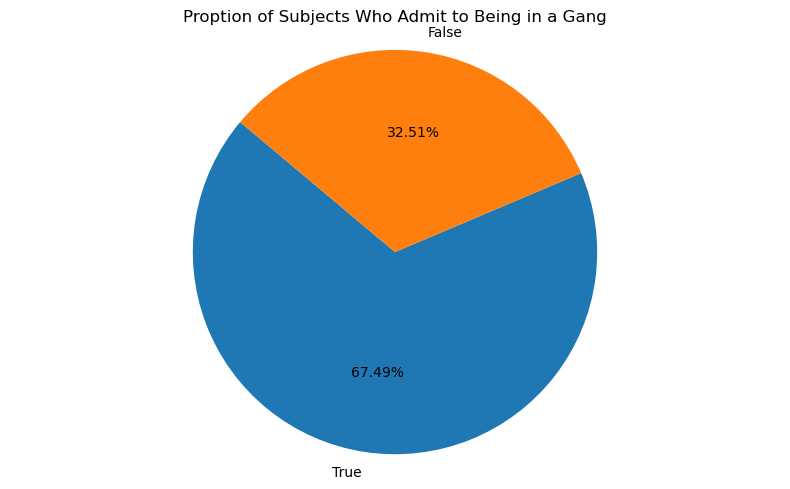

In [19]:
# Proportion of people who admit to being in a gang
gang_counts = base_df['admits_gang'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(gang_counts, labels=gang_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Proption of Subjects Who Admit to Being in a Gang")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [20]:
# Two-way table of felons and gang members
pd.crosstab(index=base_df['is_felon'], columns=base_df['admits_gang'])

admits_gang,False,True
is_felon,,
False,5495,10505
True,2622,6349


We can see from the two-way table that admitting to being in a gang might not correlate to committing a felony. Of admitted gang members, 37.67% are felons. Of people who haven't admitted to being in a gang, 32.3% are felons.

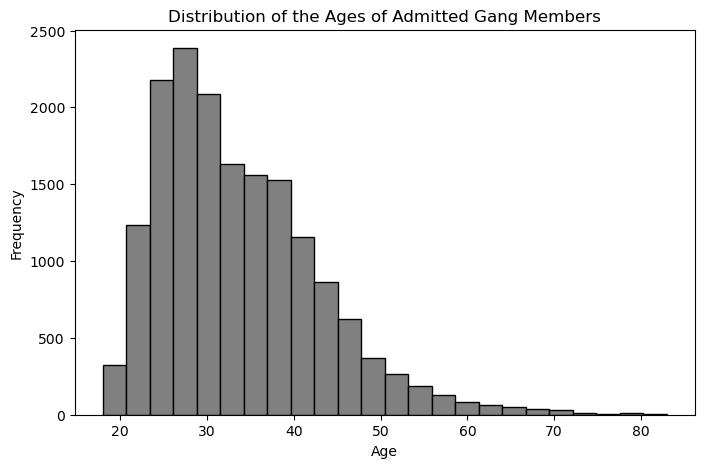

count    16836.000000
mean        33.700700
std          9.232577
min         18.010000
25%         26.637500
50%         31.880000
75%         39.070000
max         82.950000
Name: age_in_2018, dtype: float64

In [21]:
# Age
plt.figure(figsize=(8, 5))
plt.hist(base_df.loc[base_df['admits_gang'] == True, 'age_in_2018'], bins=24, color='grey', edgecolor='black')
plt.title('Distribution of the Ages of Admitted Gang Members')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
base_df.loc[base_df['admits_gang'] == True, 'age_in_2018'].describe()

It's beginning to stick out to me that admitted gang members have similar demographics to the data at large. That indicates that identifying someone as a gang member isn't necessarily helpful in determining whether they'll commit a crime or not.

## Quick Analysis: Admitting being in a gang vs. admitting gang membership to law enforcement

In [22]:
pd.crosstab(index=base_df['admitted_gang_membership_to_law_enforcement'], columns=base_df['admits_gang'])

admits_gang,False,True
admitted_gang_membership_to_law_enforcement,,
False,4172,419
True,3945,16435


What's the difference between these two categorical variables?

## Analysis: Age vs. Various Identification Techniques

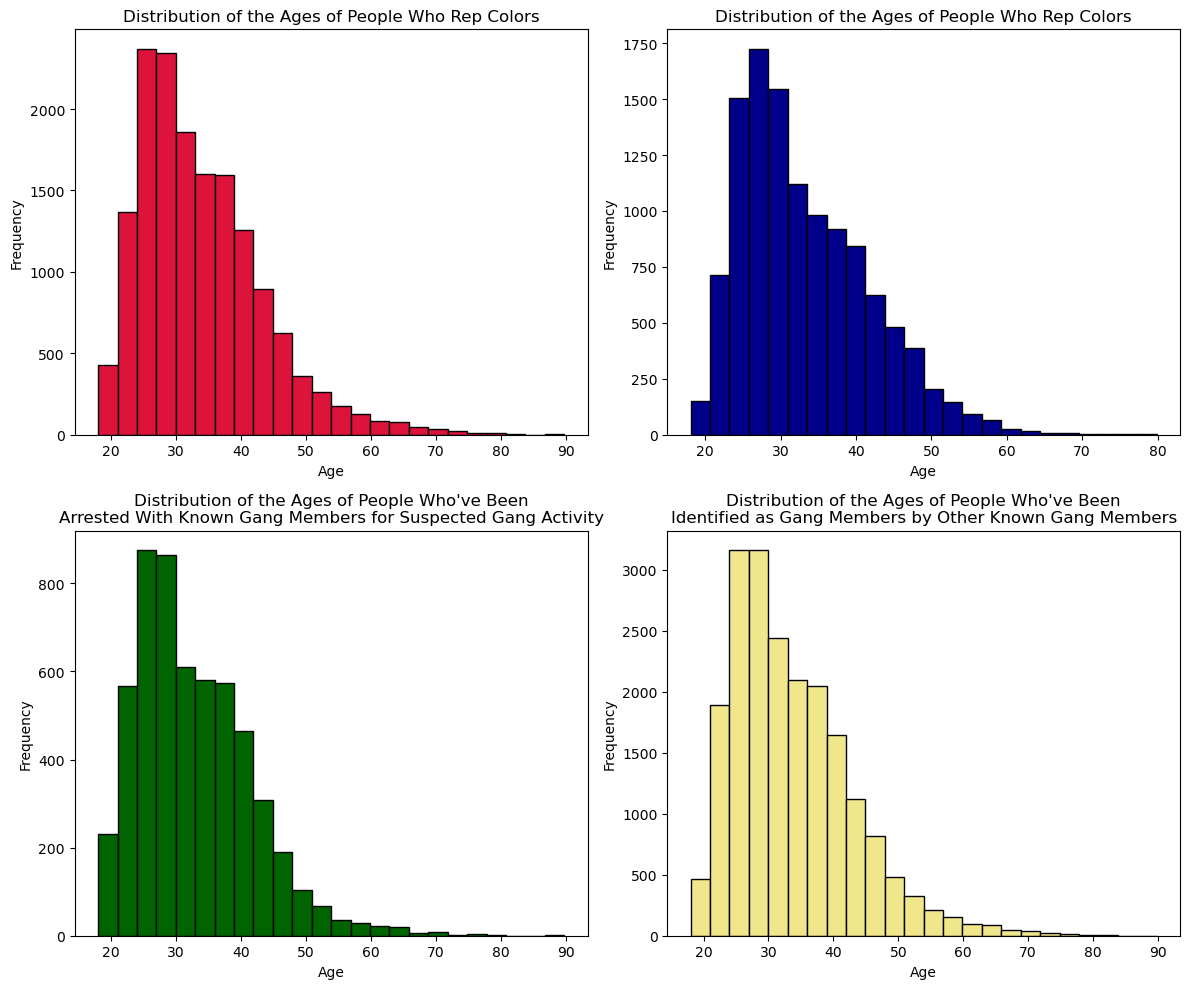

In [23]:
# Create a 2 x 2 grid to display the histograms on
plt.figure(figsize=(12, 10))

# Age distribution of people who rep colors
plt.subplot(2, 2, 1)
plt.hist(base_df.loc[base_df['wears_colors'] == True, 'age_in_2018'], bins=24, color='crimson', edgecolor='black')
plt.title('Distribution of the Ages of People Who Rep Colors')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age distribution of people with gang-related tattoos
plt.subplot(2, 2, 2)
plt.hist(base_df.loc[base_df['has_gang_related_tattoos'] == True, 'age_in_2018'], bins=24, color='darkblue', edgecolor='black')
plt.title('Distribution of the Ages of People Who Rep Colors')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age distribution of people who've been arrested with known gang members
plt.subplot(2, 2, 3)
plt.hist(base_df.loc[base_df['arrested_with_gang_members_for_suspected_gang_activity'] == True, 'age_in_2018'], bins=24, color='darkgreen', edgecolor='black')
plt.title('Distribution of the Ages of People Who\'ve Been\nArrested With Known Gang Members for Suspected Gang Activity')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age distribution of people who've been identified as gang members by other gang members
plt.subplot(2, 2, 4)
plt.hist(base_df.loc[base_df['gang_identified_by_known_gang_member'] == True, 'age_in_2018'], bins=24, color='khaki', edgecolor='black')
plt.title('Distribution of the Ages of People Who\'ve Been\nIdentified as Gang Members by Other Known Gang Members')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Analyzing Duplicated Entries

In [24]:
# Entries with the same height, weight, and age are most likely the same person
print(f"The original dataset has {len(base_df.index)} entries.")
unique_df = base_df.drop_duplicates(subset=['height', 'weight', 'age_in_2018'])
print(f"With suspected duplicates dropped, there are {len(unique_df.index)} entries.")
print()

# As a gut check, count the amount of NaN entries in height, weight, and age
print(f"There are {base_df['height'].isna().sum()} NaN entries in height.")
print(f"There are {base_df['weight'].isna().sum()} NaN entries in weight.")
print(f"There are {base_df['age_in_2018'].isna().sum()} NaN entries in age.")
print(f"There are {base_df[base_df['height'].isna() & base_df['weight'].isna() & base_df['age_in_2018'].isna()].shape[0]} entries where height, weight, and age are all NaN.")
print()

# For another check, drop all duplicate entries (excluding subject ID in the main database)
all_unique_entries_df = base_df.drop(["subject_id"], axis=1).drop_duplicates()
print(f"There are {len(base_df.index) - len(all_unique_entries_df.index)} duplicate entries in the entire dataset.")

The original dataset has 24971 entries.
With suspected duplicates dropped, there are 18832 entries.

There are 8534 NaN entries in height.
There are 8559 NaN entries in weight.
There are 672 NaN entries in age.
There are 662 entries where height, weight, and age are all NaN.

There are 524 duplicate entries in the entire dataset.


## Analysis: Gang Membership Counts

gang_id
Gangster Disciples (Folk)                 4354
Latin Kings (People)                      3650
Black P Stones (People)                   1372
Four Corner Hustlers (People)             1190
Vice Lords (People)                       1024
                                          ... 
Money Hungry Gorillas (Crew)                 1
MOB (South Bend)                             1
Indiana Avenue Thugs ("IAT") (Elkhart)       1
Devils Advocates MC (OMG)                    1
Ghetto Hot Boys (Fort Wayne)                 1
Name: count, Length: 431, dtype: int64


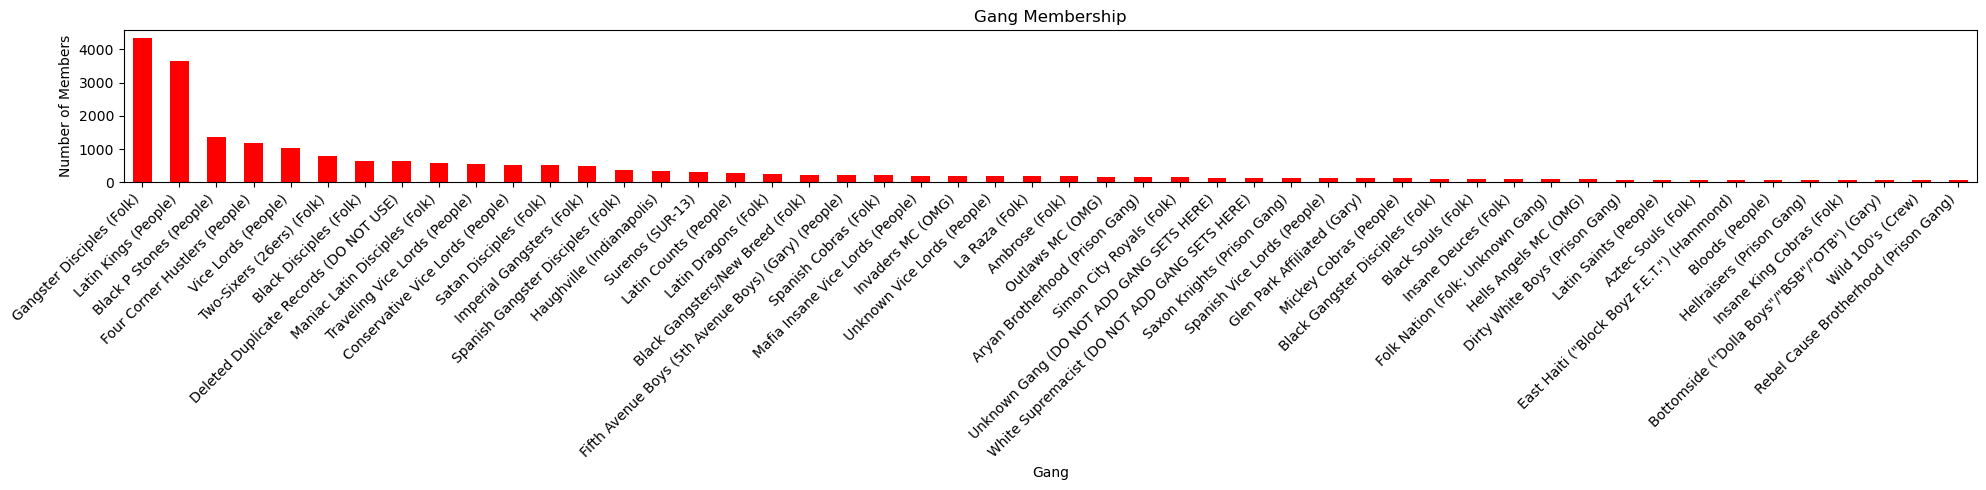

There are 257 gangs with five or fewer members.
There are 131 gangs with only one member.


count    257.000000
mean       1.949416
std        1.222099
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        5.000000
Name: count, dtype: float64

In [38]:
# Get the counts of people in each gang
gang_counts = base_df["gang_id"].value_counts()

# There are too many gangs to graph all of them
print(gang_counts)
under_five = gang_counts[gang_counts <= 5]
one_member = gang_counts[gang_counts == 1]
gang_counts = gang_counts.head(50)

# Plot a histogram of the membership amounts in each gang
plt.figure(figsize=(20, 5))
gang_counts.plot(kind='bar', color='red')
plt.title('Gang Membership')
plt.xlabel('Gang')
plt.ylabel('Number of Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the gangs that have less than five members
print(f"There are {under_five.size} gangs with five or fewer members.")
print(f"There are {one_member.size} gangs with only one member.")
under_five.describe()